In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import scipy.ndimage

In [15]:
train_img_path       = "../data/Training-Dataset/Images/"
train_mask_path      = "../data/Training-Dataset/Masks-Ideal/"
train_pred_mask_path = "../data/Training-Dataset/Predicted-Masks/"

valid_img_path       = "../data/Validation-Dataset/Images/"
valid_mask_path      = "../data/Validation-Dataset/Masks-Ideal/"
valid_pred_mask_path = "../data/Validation-Dataset/Predicted-Masks/"

### Loading Data

In [16]:
def load_images_from_folder(folder):
    images = {}
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images[filename.split('.')[0]] = img  #remove extension from file name
    return images

In [17]:
images      = load_images_from_folder(train_img_path)
masks       = load_images_from_folder(train_mask_path)
pred_masks  = load_images_from_folder(train_pred_mask_path)

In [18]:
valid_images     = load_images_from_folder(valid_img_path)
valid_masks      = load_images_from_folder(valid_mask_path)
valid_pred_masks = load_images_from_folder(valid_pred_mask_path)

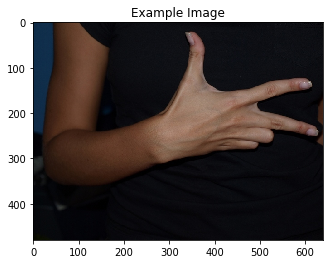

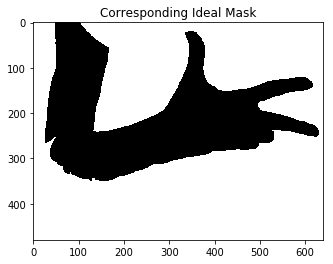

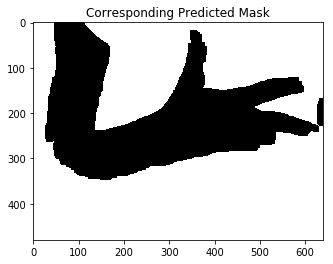

In [19]:
plt.title("Example Image")
plt.imshow(cv2.cvtColor(images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Ideal Mask")
plt.imshow(cv2.cvtColor(masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Corresponding Predicted Mask")
plt.imshow(cv2.cvtColor(pred_masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()

### Functional Code

In [20]:
def dataAugmentation(images):
    augmentation = {}
    for key in images.keys():
        image = images[key].copy()
        augmentation[key] = image
        augmentation[key + '_clock_wise'] = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
        augmentation[key + '_counter_clock_wise'] = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
        augmentation[key + '_vertical'] = cv2.flip(image, 0)
        augmentation[key + '_horizontal'] = cv2.flip(image, 1)
        augmentation[key + '_horizontal_vertical'] = cv2.flip(image, -1)
    
    return augmentation

In [35]:
def extensiveDataAugmentation(data, folderName, augment = True):
    augmentation = {}  
    print("augmenting")

    if augment:
        for key in data.keys():
            for i in range(0,360,12):
                augmentation[str(key) + 'rotation' + str(i)] = scipy.ndimage.rotate(data[key], i, reshape=False, cval = 255, mode='constant')  
    else:
        augmentation = data 

    print("resizing")  
    resize = resizeData(augmentation, filter = False)

    augmented = []
    labels = []
    for key_ in resize.keys():
        inv = 255-resize[key_]
        img = inv.clip(max=1)
        #print(np.unique(img))
        augmented.append(img)
        labels.append(np.array(folderName-1))
    
    return np.array(augmented), np.array(labels)

In [21]:
def resizeData(images, width=256, height=256, filter=True, kernel_size=5):
    resize = {}
    for key in images.keys(): 
        image = images[key].copy()
        
        if filter:
            image = cv2.GaussianBlur(image, (kernel_size, kernel_size),0 )
        
        resize[key] = cv2.resize(image, (width, height), interpolation = cv2.INTER_AREA)
        
    return resize

In [22]:
def storeData(folder, data):
    for key in data.keys():
        img = data[key]
        cv2.imwrite(folder + key + '.jpg', img)

### Data Augmentation - Rotation & Flip

In [23]:
augmented_images     = dataAugmentation(images)
augmented_masks      = dataAugmentation(masks)
augmented_pred_masks = dataAugmentation(pred_masks)

In [24]:
augmented_valid_images     = dataAugmentation(valid_images)
augmented_valid_masks      = dataAugmentation(valid_masks)
augmented_valid_pred_masks = dataAugmentation(valid_pred_masks)

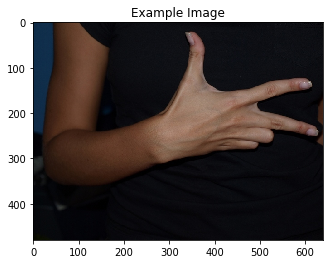

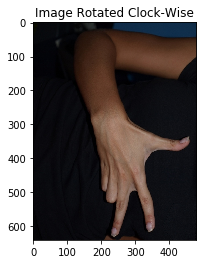

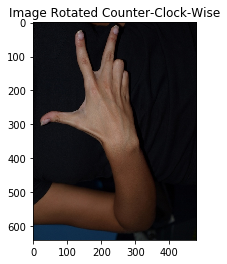

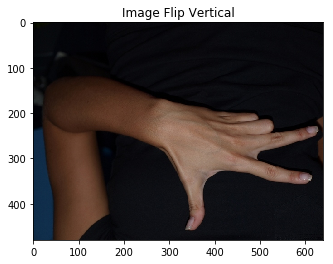

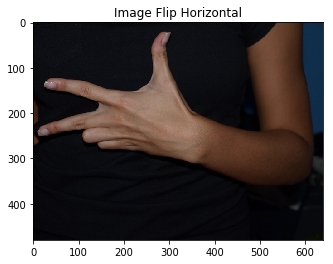

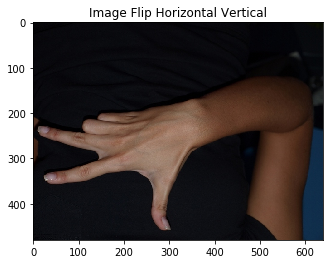

In [25]:
plt.title("Example Image")
plt.imshow(cv2.cvtColor(augmented_images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Image Rotated Clock-Wise")
plt.imshow(cv2.cvtColor(augmented_images['3_P_hgr1_id05_3_clock_wise'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Image Rotated Counter-Clock-Wise")
plt.imshow(cv2.cvtColor(augmented_images['3_P_hgr1_id05_3_counter_clock_wise'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Image Flip Vertical")
plt.imshow(cv2.cvtColor(augmented_images['3_P_hgr1_id05_3_vertical'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Image Flip Horizontal")
plt.imshow(cv2.cvtColor(augmented_images['3_P_hgr1_id05_3_horizontal'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Image Flip Horizontal Vertical")
plt.imshow(cv2.cvtColor(augmented_images['3_P_hgr1_id05_3_horizontal_vertical'], cv2.COLOR_BGR2RGB))
plt.show()

### Data Uniform Size 

In [26]:
resized_images      = resizeData(augmented_images)
resized_masks       = resizeData(augmented_masks, filter=False)
resized_pred_masks  = resizeData(augmented_pred_masks, filter=False)

In [27]:
resized_valid_images      = resizeData(augmented_valid_images)
resized_valid_masks       = resizeData(augmented_valid_masks, filter=False)
resized_valid_pred_masks  = resizeData(augmented_valid_pred_masks, filter=False)

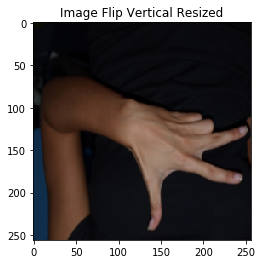

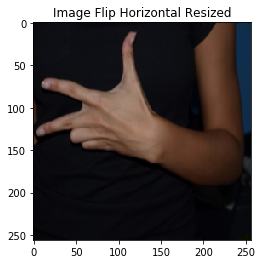

In [28]:
plt.title("Image Flip Vertical Resized")
plt.imshow(cv2.cvtColor(resized_images['3_P_hgr1_id05_3_vertical'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Image Flip Horizontal Resized")
plt.imshow(cv2.cvtColor(resized_images['3_P_hgr1_id05_3_horizontal'], cv2.COLOR_BGR2RGB))
plt.show()

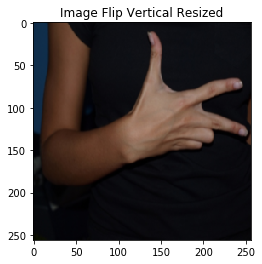

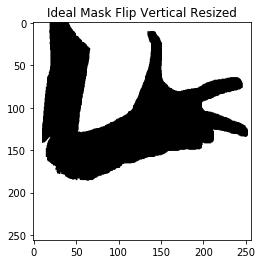

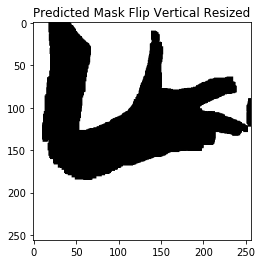

In [29]:
plt.title("Image Flip Vertical Resized")
plt.imshow(cv2.cvtColor(resized_images['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Ideal Mask Flip Vertical Resized")
plt.imshow(cv2.cvtColor(resized_masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()
plt.title("Predicted Mask Flip Vertical Resized")
plt.imshow(cv2.cvtColor(resized_pred_masks['3_P_hgr1_id05_3'], cv2.COLOR_BGR2RGB))
plt.show()

In [30]:
!mkdir ../data/Training-Dataset/Resize-Augmented-Images
!mkdir ../data/Training-Dataset/Resize-Augmented-Masks
!mkdir ../data/Training-Dataset/Resize-Augmented-Predicted-Masks

mkdir: ../data/Training-Dataset/Resize-Augmented-Images: File exists
mkdir: ../data/Training-Dataset/Resize-Augmented-Masks: File exists
mkdir: ../data/Training-Dataset/Resize-Augmented-Predicted-Masks: File exists


In [31]:
storeData("../data/Training-Dataset/Resize-Augmented-Images/", resized_images)
storeData("../data/Training-Dataset/Resize-Augmented-Masks/", resized_masks)
storeData("../data/Training-Dataset/Resize-Augmented-Predicted-Masks/", resized_pred_masks)

In [32]:
!mkdir ../data/Validation-Dataset/Resize-Augmented-Images
!mkdir ../data/Validation-Dataset/Resize-Augmented-Masks
!mkdir ../data/Validation-Dataset/Resize-Augmented-Predicted-Masks

mkdir: ../data/Validation-Dataset/Resize-Augmented-Images: File exists
mkdir: ../data/Validation-Dataset/Resize-Augmented-Masks: File exists
mkdir: ../data/Validation-Dataset/Resize-Augmented-Predicted-Masks: File exists


In [33]:
storeData("../data/Validation-Dataset/Resize-Augmented-Images/", resized_valid_images)
storeData("../data/Validation-Dataset/Resize-Augmented-Masks/", resized_valid_masks)
storeData("../data/Validation-Dataset/Resize-Augmented-Predicted-Masks/", resized_valid_pred_masks)